In [1]:
import numpy as np, matplotlib.pyplot as plt
import plotting.hg_hb_ha_plotting as MMT_plotting
import plotting.hb_ha_plotting as Keck_plotting
import plotting.general_plotting as general_plotting
import writing_tables.hg_hb_ha_tables as MMT_twriting
import writing_tables.hb_ha_tables as Keck_twriting
import writing_tables.general_tables as general_twriting
from analysis.sdf_stack_data import stack_data
from create_ordered_AP_arrays import create_ordered_AP_arrays
from astropy.io import fits as pyfits, ascii as asc
from astropy.table import Table
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def correct_instr_AP(indexed_AP, indexed_inst_str0, instr):
    '''
    Returns the indexed AP_match array based on the 'match_index' from
    plot_MMT/Keck_Ha
    '''
    for ii in range(len(indexed_inst_str0)):
        if indexed_inst_str0[ii]=='merged,':
            if instr=='MMT':
                indexed_AP[ii] = indexed_AP[ii][:5]
            elif instr=='Keck':
                indexed_AP[ii] = indexed_AP[ii][6:]
        #endif
    #endfor
    return indexed_AP
#enddef

In [3]:
full_path = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'
good_NB921_Halpha = ['S.245','S.278','S.291','S.306','S.308','S.333','S.334',
                     'S.350','S.364','A.134','D.076','D.099','D.123','D.125',
                     'D.127','D.135','D.140','D.215','D.237','D.298'] ##used
inst_dict = {} ##used
inst_dict['MMT'] = ['MMT,FOCAS,','MMT,','merged,','MMT,Keck,']
inst_dict['Keck'] = ['merged,','Keck,','Keck,Keck,','Keck,FOCAS,',
                     'Keck,FOCAS,FOCAS,','Keck,Keck,FOCAS,']
tol = 3 #in angstroms, used for NII emission flux calculations ##used

nbia = pyfits.open(full_path+'Catalogs/python_outputs/nbia_all_nsource.fits')
nbiadata = nbia[1].data
NAME0 = nbiadata['source_name'] ##used

zspec = asc.read(full_path+'Catalogs/nb_ia_zspec.txt',guess=False,
                 Reader=asc.CommentedHeader)
inst_str0 = np.array(zspec['inst_str0']) ##used

fout  = asc.read(full_path+'FAST/outputs/NB_IA_emitters_allphot.emagcorr.ACpsf_fast.fout',
                 guess=False,Reader=asc.NoHeader)
stlr_mass = np.array(fout['col7']) ##used

data_dict = create_ordered_AP_arrays() ##make this used instead??
AP = data_dict['AP'] ##used
HA_Y0 = data_dict['HA_Y0'] ##used
HB_Y0 = data_dict['HB_Y0'] ##used
HG_Y0 = data_dict['HG_Y0'] ##used

print '### looking at the MMT grid'
griddata = asc.read(full_path+'Spectra/spectral_MMT_grid_data.txt',guess=False)
gridz  = np.array(griddata['ZSPEC']) ##used
gridap = np.array(griddata['AP']) ##used
grid   = pyfits.open(full_path+'Spectra/spectral_MMT_grid.fits')
grid_ndarr = grid[0].data ##used
grid_hdr   = grid[0].header
CRVAL1 = grid_hdr['CRVAL1']
CDELT1 = grid_hdr['CDELT1']
NAXIS1 = grid_hdr['NAXIS1']
x0 = np.arange(CRVAL1, CDELT1*NAXIS1+CRVAL1, CDELT1) ##used

### done reading input files
### creating ordered AP arr
### done creating ordered AP arr
### creating ordered HA,HB,HG_Y0 arr
### done creating ordered HA,HB,HG_Y0 arrays
### looking at the MMT grid


In [4]:
# out of the, say, the first bin of the <9264 sample w/ valid stlr mass (say ~2000)
# a smaller subset of them will have valid spectra. find them by AP
table_arrays = ([], [], [], [], [], [], [], [], [], [], [])
(tablenames, tablefluxes, nii6548fluxes, nii6583fluxes, ewlist, 
    ewposlist , ewneglist, ewchecklist, medianlist, pos_amplitudelist, 
    neg_amplitudelist) = table_arrays
index_list = general_plotting.get_index_list(NAME0, inst_str0, inst_dict, 'MMT')
(xmin_list, xmax_list, label_list, 
    subtitle_list) = general_plotting.get_iter_lists('MMT')

In [5]:
# 1. bin the stellar masses into 5 roughly equal bins (first estimate)
nan_stlr_mass = np.copy(stlr_mass)
nan_stlr_mass[nan_stlr_mass < 0] = np.nan

bin_index_dict = {}
perc_arr = [20,40,60,80,100]
for ii in range(len(perc_arr)):
    perc2 = np.nanpercentile(nan_stlr_mass, perc_arr[ii])
    if ii == 0:
        bin_index = np.array([x for x in range(len(stlr_mass)) if stlr_mass[x] <= perc2])
    else:
        perc1 = np.nanpercentile(nan_stlr_mass, perc_arr[ii-1])
        bin_index = np.array([x for x in range(len(stlr_mass)) if stlr_mass[x] <= perc2
                             and stlr_mass[x] > perc1])
    bin_index_dict['perc'+str(ii)] = bin_index
#endfor

print 'done!'

done!


In [6]:
# 2. look at the galaxies in the first stellar mass bin with valid spectra (find by AP)
bin_index_1 = bin_index_dict['perc0']
valid_spectra_bin1 = np.where(AP[bin_index_1] != 'N/A')[0]
valid_spectra_bin1_indexes = bin_index_1[valid_spectra_bin1]

In [15]:
# 3. stack those spectra of those galaxies across all filters
#hgamma
xmin0 = 4341-60
xmax0 = 4341+60
AP_match = AP[valid_spectra_bin1_indexes]
input_index = np.array([x for x in range(len(gridap)) if gridap[x] in        
                        AP_match],dtype=np.int32)
# print AP_match
# good_index = [x for x in range(len(input_norm)) if
#               input_norm[x]!=-99.99999 and input_norm[x]!=-1
#               and input_norm[x]!=0]
# match_index = match_index0[good_index]
        
# AP_match = correct_instr_AP(AP_match, inst_str0[match_index], 'MMT')
# print AP_match
# # print input_index
# # xval, yval = stack_data(grid_ndarr, gridz, input_index, x0, xmin0, xmax0)

['S.001' 'S.002' 'D.206' 'S.222' '4.242' 'S.224' '4.243' '1.248' 'S.143'
 '3.299' '2.299' 'S.145' 'S.003' '07.104' 'S.004' 'S.227' 'S.233' 'S.236'
 'S.237' 'S.240' 'S.241,34.026' 'S.244' '2.245' 'S.246' '1.299' 'S.247'
 'D.195,34.057' 'S.146' 'S.005' '34.052' '4.290' 'S.255' 'S.257'
 'S.258,34.055' 'S.260' '2.229' 'S.006' '1.241' '3.259' '37.041' '27.091'
 '3.244' '1.258' 'D.248' 'S.271' 'S.272' 'S.274,31.021' 'S.275,11.087'
 'S.277' 'D.237,30.054' 'S.008' 'D.213' 'S.116' 'S.009' '37.093'
 '1.279,00.122' '37.069' 'S.288,30.056' '10.077' 'S.289' 'D.041' 'S.297'
 'S.298,00.123' '36.105' 'S.010' 'S.011' '2.059,31.056' 'D.014' 'D.112'
 '22.085' 'S.304,32.018' 'S.307' '1.072' 'S.013' 'S.014,25.087' 'D.108'
 'D.131,36.050' '36.058' 'S.314' 'D.103,39.037' '36.094' 'S.016,39.040'
 'S.317' 'S.321,36.053' 'S.017' 'S.326' '36.104' '3.026' 'S.018' '36.103'
 'S.336' '33.094' '33.044' 'S.341,33.045' 'S.343,33.046' '33.071' 'S.345'
 'S.119' 'S.349' 'S.355' 'S.356' 'S.357' 'S.358' 'D.086' 'S.359' 'S.3

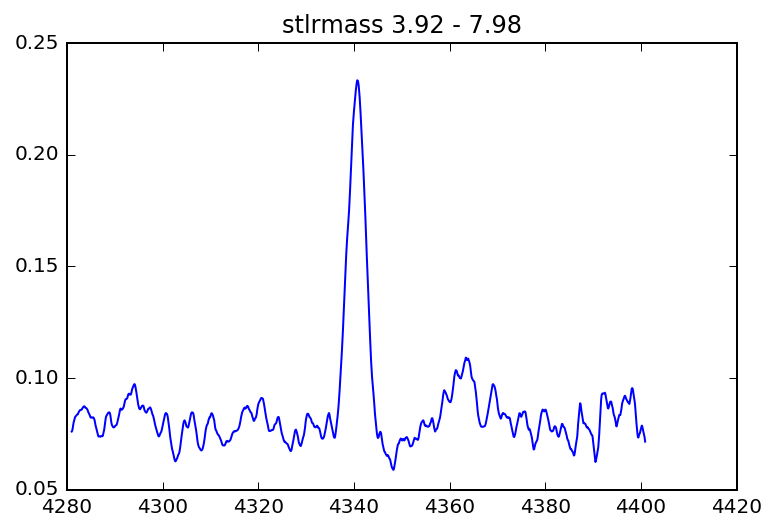

In [8]:
plt.plot(xval, yval/1e-17)
plt.title('stlrmass 3.92 - 7.98')

In [9]:
# questionable?
zs = np.array(gridz[input_index])
good_z = np.where(zs < 0.1)[0]
zs = np.average(zs[good_z])
dlambda = (x0[1]-x0[0])/(1+zs)
#

['S.001' 'S.002' 'D.206' 'S.222' '4.242' 'S.224' '4.243' '1.248' 'S.143'
 '3.299' '2.299' 'S.145' 'S.003' '07.104' 'S.004' 'S.227' 'S.233' 'S.236'
 'S.237' 'S.240' 'S.241,34.026' 'S.244' '2.245' 'S.246' '1.299' 'S.247'
 'D.195,34.057' 'S.146' 'S.005' '34.052' '4.290' 'S.255' 'S.257'
 'S.258,34.055' 'S.260' '2.229' 'S.006' '1.241' '3.259' '37.041' '27.091'
 '3.244' '1.258' 'D.248' 'S.271' 'S.272' 'S.274,31.021' 'S.275,11.087'
 'S.277' 'D.237,30.054' 'S.008' 'D.213' 'S.116' 'S.009' '37.093'
 '1.279,00.122' '37.069' 'S.288,30.056' '10.077' 'S.289' 'D.041' 'S.297'
 'S.298,00.123' '36.105' 'S.010' 'S.011' '2.059,31.056' 'D.014' 'D.112'
 '22.085' 'S.304,32.018' 'S.307' '1.072' 'S.013' 'S.014,25.087' 'D.108'
 'D.131,36.050' '36.058' 'S.314' 'D.103,39.037' '36.094' 'S.016,39.040'
 'S.317' 'S.321,36.053' 'S.017' 'S.326' '36.104' '3.026' 'S.018' '36.103'
 'S.336' '33.094' '33.044' 'S.341,33.045' 'S.343,33.046' '33.071' 'S.345'
 'S.119' 'S.349' 'S.355' 'S.356' 'S.357' 'S.358' 'D.086' 'S.359' 'S.3

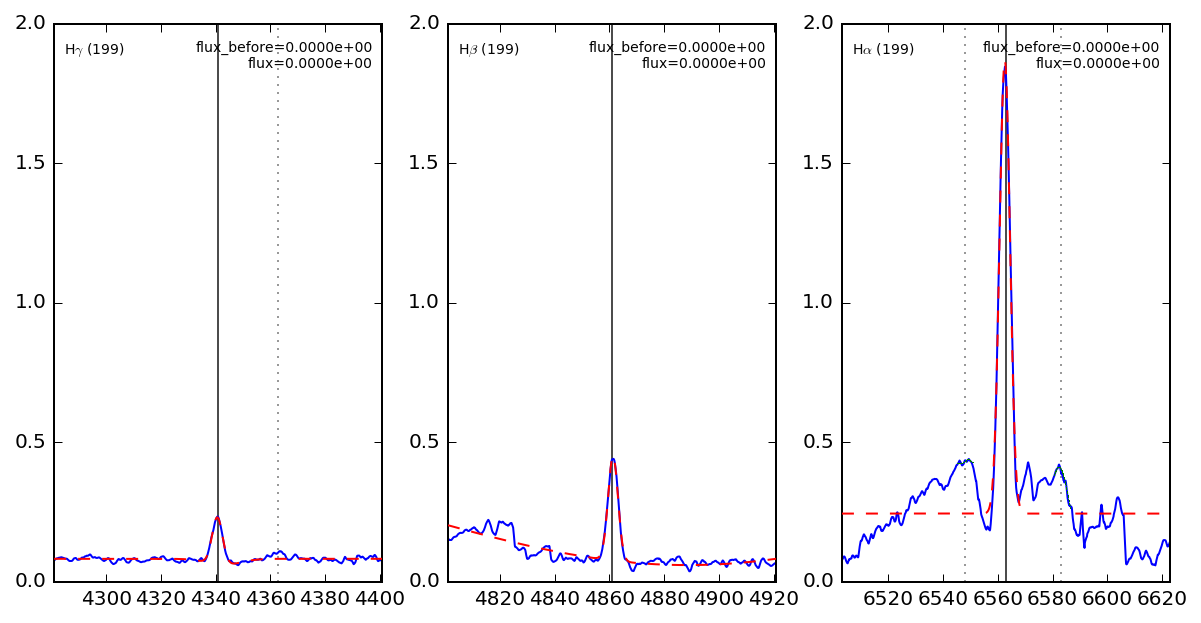

In [21]:
# trying iteration!
f, axarr = plt.subplots(1, 3)
f.set_size_inches(10, 5)
index_list = general_plotting.get_index_list(NAME0, inst_str0, inst_dict, 'MMT')
ax_list = [axarr[0],axarr[1],axarr[2]]
xmin_list = np.array([4341,4861,6563])-60
xmax_list = np.array([4341,4861,6563])+60
label_list=[r'H$\gamma$',r'H$\beta$',r'H$\alpha$']
subtitle_list=['','','']
num=0


for (match_index0,ax,xmin0,xmax0,label,subtitle) in zip(index_list, ax_list, xmin_list, xmax_list,                 
                                                        label_list, subtitle_list):
#     if 'gamma' in label:
#         input_norm = HG_Y0[match_index0]
#     elif 'beta' in label:
#         input_norm = HB_Y0[match_index0]
#     elif 'alpha' in label:
#         input_norm = HA_Y0[match_index0]
#     #endif
    
#     good_index = [x for x in range(len(input_norm)) if
#                   input_norm[x]!=-99.99999 and input_norm[x]!=-1
#                   and input_norm[x]!=0]
#     match_index = match_index0[good_index]
#     AP_match = correct_instr_AP(AP[match_index], inst_str0[match_index], 'MMT')
    
    AP_match = AP[valid_spectra_bin1_indexes]
    print AP_match
    input_index = np.array([x for x in range(len(gridap)) if gridap[x] in        
                            AP_match],dtype=np.int32)
    
    label += ' ('+str(len(input_index))+')'

    xval, yval = stack_data(grid_ndarr, gridz, input_index, x0, xmin0, xmax0)
    
    # ???
    zs = np.array(gridz[input_index])
    if subtitle=='NB704' or subtitle=='NB711':
        good_z = np.where(zs < 0.1)[0]
    elif subtitle=='NB816':
        good_z = np.where(zs < 0.3)[0]
    elif subtitle=='NB921':
        good_z = np.where(zs < 0.6)[0]
    elif subtitle=='NB973':
        good_z = np.where(zs < 0.6)[0]
    else:
        good_z = np.array(range(len(zs)))
    #endif
    zs = np.average(zs[good_z])
    dlambda = (x0[1]-x0[0])/(1+zs)
    # ???
    
    ax, flux, flux2, flux3, pos_flux, o1, o2, o3 = MMT_plotting.subplots_plotting(            
        ax, xval, yval, label, subtitle, dlambda, xmin0, xmax0, tol)
    
    ax = MMT_plotting.subplots_setup(ax, ax_list, label, subtitle, num)
    
    
    num +=1
#endfor

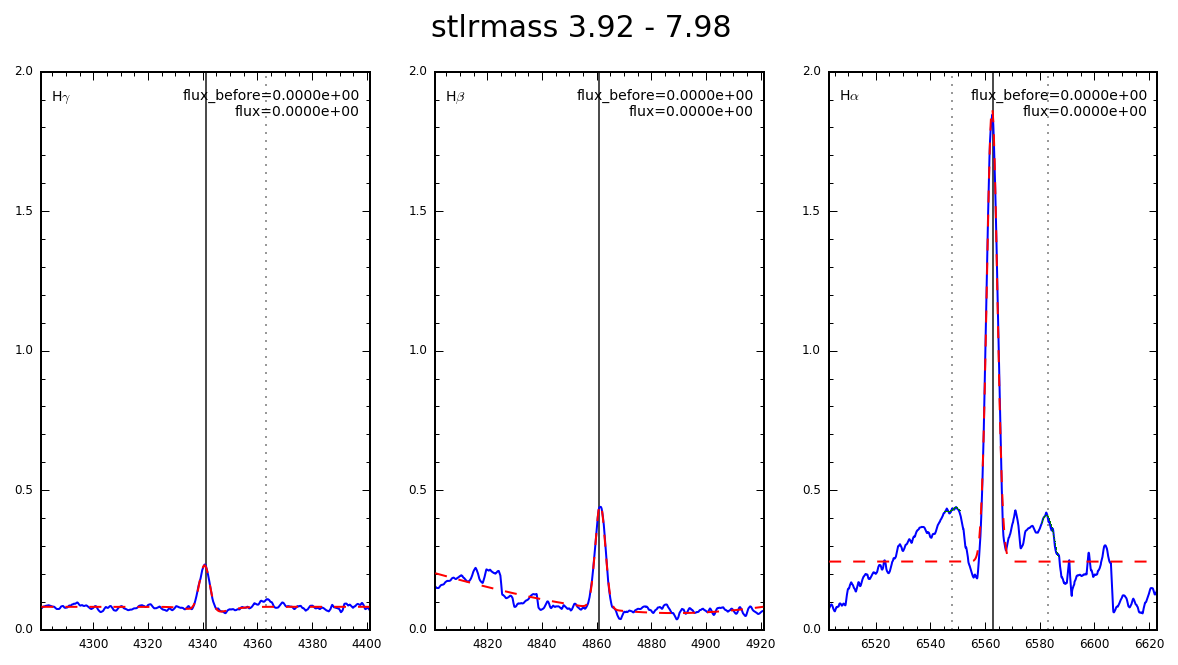

In [20]:
f = general_plotting.final_plot_setup(f, 'stlrmass 3.92 - 7.98')
f

In [18]:
NAME0

chararray(['Ha-NB704_001870', 'OIII-NB704_004690', 'OII-NB704_004834', ...,
       'IA679_177230', 'IA679_177353', 'IA679_177521'], 
      dtype='|S67')